# Linear Regression


## Introduction

Investigating the relationship between two different variables is called regression. In an ML context, that relationship can be used to predict the outcome of events that are yet to take place. 

## How does it work?

Python has built in methods and functions for finding a relationship between data-points and for drawing a line of linear regression (best fit). You can use these methods instead of implementing the mathematical formula.

## Linear Regression with Scipy Module

In [1]:
!pip install matplotlib
!pip install scipy
!pip install numpy
!pip install pandas


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


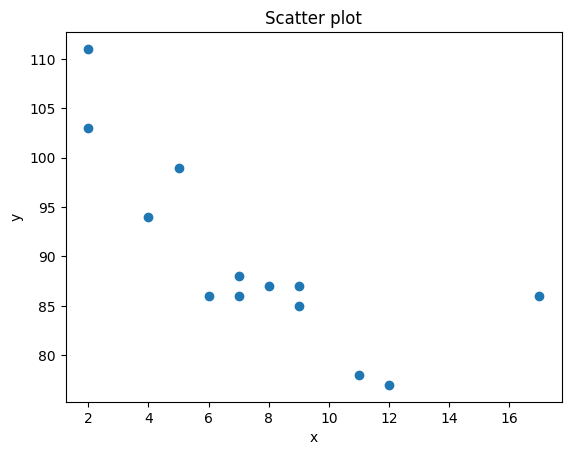

In [4]:
import matplotlib.pyplot as plt

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(x, y)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

[np.float64(94.3495217071376), np.float64(90.84694628403237), np.float64(89.09565857247976), np.float64(90.84694628403237), np.float64(99.60338484179543), np.float64(73.33406916850626), np.float64(99.60338484179543), np.float64(87.34437086092716), np.float64(96.1008094186902), np.float64(83.84179543782193), np.float64(82.09050772626932), np.float64(87.34437086092716), np.float64(92.59823399558499)]


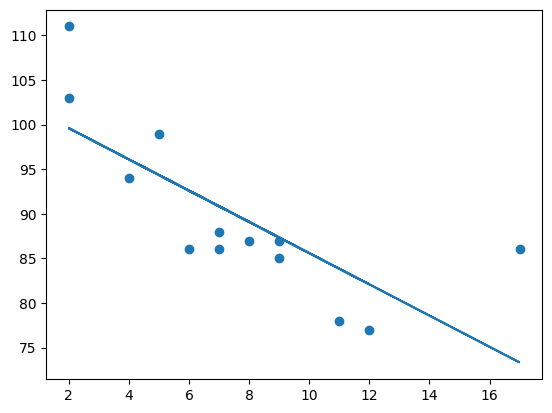

In [ ]:
# now we can find th e line of best fit
import numpy as np
from scipy import stats


# you'll need the slope and intercept of the line 
# slope: gradient of the line
# intercept: where the line crosses the y-axis
# r_value: correlation coefficient
# p_value: 2-tailed p-value
# std_err: standard error of the estimate
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
def predict(x):
    return slope * x + intercept

mymodel = list(map(predict, x))
print(mymodel)
plt.scatter(x, y)
plt.plot(x, mymodel)

## Relationship

It is important to know how the relationship between the values of x-axis and the values of y-axis is. If there is no relationship at all then the linear regression will not be able to find the line of best fit. This relationship (known as the coefficient of correlation) is defined as r. 

The r value ranges from -1 to 1 where:
- 0 means no relationship
- 1 (and -1) means 100% related (either positive correlation going up or negative correlation going down)

In [9]:
print(r_value)

-0.7585915243761551


## Predict future values

We can predict the speed of a 10 year old's car

In [10]:
speed = predict(10)

In [11]:
speed

np.float64(85.59308314937454)

## What happens if there is no correlation?

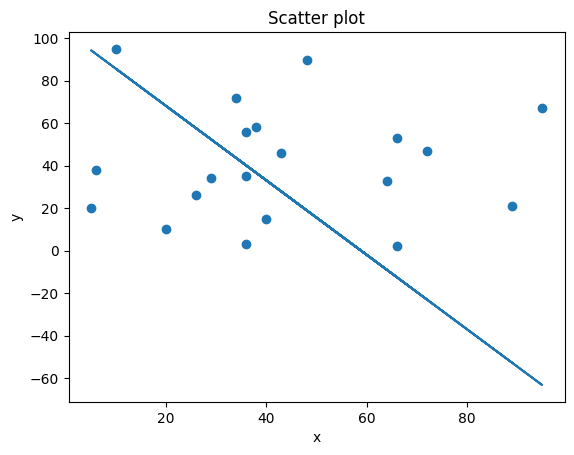

LinregressResult(slope=np.float64(0.01391658139845265), intercept=np.float64(40.452282828936454), rvalue=np.float64(0.01331814154297493), pvalue=np.float64(0.9555588004401059), stderr=np.float64(0.24627150586388077), intercept_stderr=np.float64(12.22174299487399))


In [14]:
x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

result = stats.linregress(x, y)

mymodel = list(map(predict, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print(result)

The r-value is 0.013, which is an extremely weak relationship

# Artificial Neural Networks

## Introduction

- A Neural Network is a Supervised Machine Learning Algorithm
- They are particularly good at classification problems
- They try to copy how brain neurons work together to make decisions
- Creating and training a neural network model requires a lot of time and computing power. 

In [15]:
!pip install numpy
!pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [17]:
import numpy as np
from sklearn.datasets import load_digits 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [18]:
# load the dataset
dataset = load_digits()
print(dataset.data)
print(dataset.data[0][2])

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
5.0


In [19]:
print(dataset.data.shape)

(1797, 64)


<Figure size 640x480 with 0 Axes>

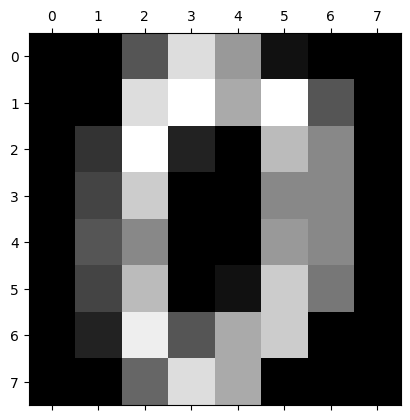

In [20]:
plt.gray()
plt.matshow(dataset.images[0])
plt.show()

In [21]:
# target refers to the classification target (the correct classes)
# the random state controls the data shufflinf which is applied before the split
# x refers to the data nad y refers to the correct classifications 

In [22]:
print(dataset.target)
print(len(dataset.target))

[0 1 2 ... 8 9 8]
1797


In [23]:
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, random_state=4, shuffle=True, test_size=0.2)
print(x_train)
print(x_train.shape)

[[ 0.  0. 10. ...  0.  0.  0.]
 [ 0.  4. 16. ...  0.  0.  0.]
 [ 0.  0.  1. ... 11.  1.  0.]
 ...
 [ 0.  0.  3. ... 10.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 [ 0.  0.  8. ... 10.  1.  0.]]
(1437, 64)


In [24]:
NN = MLPClassifier()

In [25]:
NN.fit(x_train, y_train) # training the model
y_pred = NN.predict(x_test) # testing the model
print(y_pred)
print(y_test)

[8 7 0 5 3 5 1 3 1 8 2 7 8 4 7 7 8 3 0 6 9 7 1 0 8 6 8 1 0 0 0 2 7 1 1 7 6
 3 1 3 4 2 9 5 2 0 0 7 3 3 2 9 7 6 1 8 5 8 6 7 5 6 9 3 1 4 1 9 7 8 4 4 2 4
 1 6 6 7 8 1 2 6 9 1 7 4 2 6 7 3 7 5 4 8 5 1 5 6 7 1 2 5 5 2 0 8 5 2 2 3 0
 4 5 6 9 3 9 5 7 4 7 8 9 4 9 7 9 7 9 4 3 0 5 4 9 2 3 2 9 6 2 6 0 5 5 8 9 2
 4 3 4 4 2 0 9 8 4 3 6 6 2 9 7 1 5 7 6 0 5 3 2 3 1 3 2 6 6 0 8 2 5 7 6 8 4
 6 2 2 0 4 0 3 0 4 0 1 5 6 4 7 1 5 4 5 5 3 4 4 6 3 7 1 1 3 5 7 5 0 1 9 5 0
 8 7 4 0 6 6 5 0 2 4 2 9 4 0 6 2 9 1 9 6 3 9 0 8 3 1 2 1 3 2 0 9 0 7 5 9 1
 8 6 9 6 8 8 6 2 4 5 9 9 1 5 2 8 4 7 9 8 8 0 1 7 3 2 2 1 0 3 2 3 9 7 2 0 0
 1 2 6 0 9 9 7 8 5 4 0 0 1 5 7 1 0 3 9 8 5 4 7 0 4 9 5 6 0 8 2 0 5 2 3 2 2
 4 2 8 7 5 8 8 6 9 2 6 4 5 9 5 4 1 7 2 7 3 4 8 5 4 3 7]
[6 7 0 5 3 5 1 3 1 8 2 7 8 4 7 7 8 3 0 6 9 7 8 0 8 6 8 1 0 0 0 2 7 1 1 7 6
 3 1 3 4 2 9 3 2 0 0 7 3 3 2 9 7 6 1 8 5 8 6 7 5 6 9 3 1 4 1 9 7 8 4 4 2 4
 1 6 6 7 8 1 2 6 9 1 7 4 2 6 7 3 7 5 4 8 5 1 5 6 7 1 2 5 5 2 0 8 5 2 2 3 0
 4 5 6 9 3 9 5 7 4 7 8 9 4 9 7 9 7 9 4 3 0 5

In [26]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9861111111111112


In [27]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 31  1  0  0  0  0  0  0  0]
 [ 0  0 41  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 38  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  1  0]
 [ 0  0  0  0  0  0  0 38  0  0]
 [ 0  2  0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0  0  0 35]]
